In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
df = pd.read_csv('toydata-truncated.txt', sep='\t')
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [3]:
X_train = df[['x1', 'x2']].values
y_train = df['label'].values
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [4]:
X_train.shape

(20, 2)

In [5]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
y_train.shape

(20,)

In [12]:
np.bincount(y_train) # bincount counts occurances in order 0 10 times and 1 10 times, if using weights it times the weights

array([10, 10])

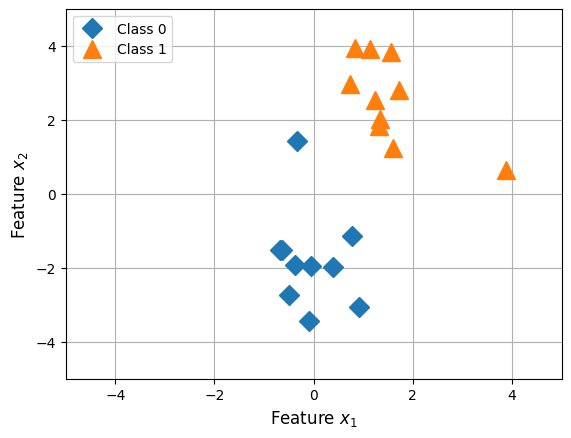

In [15]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [16]:
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

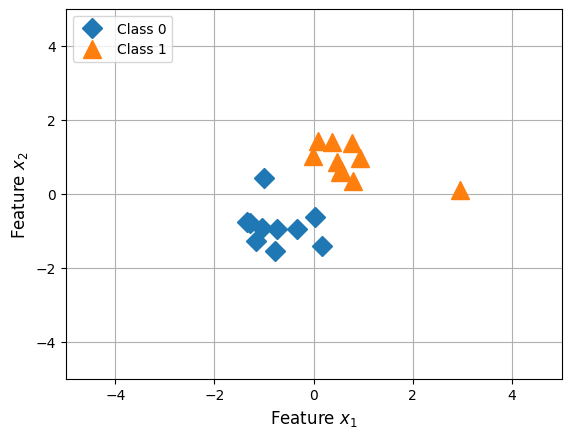

In [17]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [19]:
import torch.nn.functional as F

class LogisticRegression(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        self.linear = torch.nn.Linear(num_features, num_classes)

    def forward(self, x):
        logits = self.linear(x)
        return logits

In [30]:
torch.manual_seed(1)
model = LogisticRegression(num_features=2, num_classes=2)

In [21]:
x = torch.tensor([[1.1,2.1],
                  [1.1,2.1],
                  [9.1,4.1]])

with torch.no_grad(): # no_grad just showing how the model works as an example we dont care about gradient optimization
    logits = model(x)
    probas = F.softmax(logits, dim=1)

print(probas)

tensor([[0.1312, 0.8688],
        [0.1312, 0.8688],
        [0.6970, 0.3030]])


In [47]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.features = torch.tensor(X, dtype=torch.float32)
        self.labels = torch.tensor(y, dtype=torch.int64)

    def __getitem__(self, index):
        x = self.features[index]
        y = self.labels[index]
        return x, y

    def __len__(self):
        return self.labels.shape[0]

train_ds = MyDataset(X_train, y_train)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=10,
    shuffle=True,
)

In [53]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)
num_epochs = 20

for epoch in range(num_epochs):
    model = model.train()
    for batch_idx, (features, class_labels) in enumerate(train_loader):
        
        outputs = model(features)
        loss = F.cross_entropy(outputs, class_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f'Epoch: {epoch+1:03d}/{num_epochs:03d}'
                f' | Batch {batch_idx:03d}/{len(train_loader):03d}'
                f' | Loss: {loss:.2f}')

Epoch: 001/020 | Batch 000/002 | Loss: 1.90
Epoch: 001/020 | Batch 001/002 | Loss: 1.59
Epoch: 002/020 | Batch 000/002 | Loss: 0.09
Epoch: 002/020 | Batch 001/002 | Loss: 3.06
Epoch: 003/020 | Batch 000/002 | Loss: 1.51
Epoch: 003/020 | Batch 001/002 | Loss: 1.41
Epoch: 004/020 | Batch 000/002 | Loss: 2.74
Epoch: 004/020 | Batch 001/002 | Loss: 0.02
Epoch: 005/020 | Batch 000/002 | Loss: 0.77
Epoch: 005/020 | Batch 001/002 | Loss: 1.80
Epoch: 006/020 | Batch 000/002 | Loss: 1.72
Epoch: 006/020 | Batch 001/002 | Loss: 0.68
Epoch: 007/020 | Batch 000/002 | Loss: 2.28
Epoch: 007/020 | Batch 001/002 | Loss: 0.00
Epoch: 008/020 | Batch 000/002 | Loss: 0.61
Epoch: 008/020 | Batch 001/002 | Loss: 1.48
Epoch: 009/020 | Batch 000/002 | Loss: 0.81
Epoch: 009/020 | Batch 001/002 | Loss: 1.13
Epoch: 010/020 | Batch 000/002 | Loss: 0.21
Epoch: 010/020 | Batch 001/002 | Loss: 1.60
Epoch: 011/020 | Batch 000/002 | Loss: 1.70
Epoch: 011/020 | Batch 001/002 | Loss: 0.00
Epoch: 012/020 | Batch 000/002 |

In [54]:
def compute_accuracy(model, dataloader):
    model = model.eval()
    correct = 0.0
    total_examples = 0

    for idx, (features, class_labels) in enumerate(dataloader):
        
        with torch.no_grad():
            logits = model(features)

        pred = torch.argmax(logits, dim=1)

        compare = class_labels == pred
        correct += torch.sum(compare)
        total_examples += len(compare)

    return correct / total_examples

In [55]:
train_acc = compute_accuracy(model, train_loader)
print(f'Accuracy: {train_acc*100}%')

Accuracy: 90.0%


In [56]:
print(torch.cuda.is_available())

False


In [57]:
print(torch.backends.mps.is_available()) # Mac equivlent to Nvidia cuda
# mps_device = torch.device("mps")

True


# Loding data onto a single GPU MacOS

In [58]:
my_tensor = torch.tensor([1.,2.,3.])
my_tensor

tensor([1., 2., 3.])

In [59]:
my_tensor = my_tensor.to('mps')
my_tensor

tensor([1., 2., 3.], device='mps:0')

In [60]:
my_tensor = my_tensor.to('cpu')
my_tensor

tensor([1., 2., 3.])